# Identificação

- Curso: Santander Coders 2023 | 2º Semestre - DS (3) | Turma #1116

- Aluna: Juliana Bertolucci Peixoto | Id: 1116030

- Módulo: [DS-PY-004] Técnicas de programação I (PY) 

- Professor: Thiago Tavares Magalhães

- Professor assistente: Aruã de Mello Sousa


# Sobre o projeto

## 1. Objetivo Geral
- Realizar uma análise exploratória de dados de vendas online, utilizando um conjunto de dados real.

## 2. Objetivos Específicos
- Extrair insights e entender melhor o fenômeno das vendas e do que lhe diz respeito:
    - clientes
    - fornecedores
    - produtos
    - pagamentos
    - etc.
- Aplicar o que aprendemos a respeito de Numpy,Pandas e Git durante as aulas do módulo.

### 2.1. Tarefas que se devem cumprir:
- 2.1.1. Ler pelo menos dois datasets (.csv) como objetos Pandas DataFrames e, a partir disso, trabalhar com estes objetos do tipo DataFrame.
- 2.1.2. Realizar análise exploratória inicial das tabelas:
    - quantidade de registros, 
    - nomes e tipos de dados das  colunas de cada tabela
    - quantidade de dados faltantes (nulos ou NaN),
    - proporção de cada valor para colunas categóricas,
    - para cada coluna numérica, cacular medidas estatísticas como:
        - mediana,
        - média,
        - mínimo,
        - máximo,
        - desvio padrão.
- 2.1.3. Levantar e responder pelo menos três questões a respeito dos dados de modo que as respostas demandem um filtro por máscara de seleção booleana. Tais como:
    - Na tabela de pagamentos, há pagamentos do tipo “boleto” com mais de uma parcela?
    - Quais são exatamente os pagamentos que tem um valor maior ou menor do que o valor médio dos pagamentos registrados na tabela de pagamentos?
    - Na tabela de clientes, quem são os clientes que provém de uma das 3 cidades mais comuns da tabela?
- 2.1.4. Ao menos 2 vezes, criar um ndarray e adicioná-lo a alguma tabela como uma nova coluna.
    - Para isso, encontrar alguma informação que você julgue parecer útil e que possa ser derivada das colunas já existentes na tabela.
- 2.1.5. Demonstrar conhecimentos em GIT.

## 3. Sobre  base de dados

A base de dados utilizada foi a *Brazilian E-Commerce Public Dataset by Olist*, disponível no <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce" alt="_blank">kaggle</a> e composta por 9 datasets .csv:

- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_orders_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv
- product_category_name_translation.csv

É um dataset público, sob licença <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/" alt="_blank">CC BY-NC-SA 4.0</a> e não atualizável.

Apresenta informações reais e anonimizadas de 100 mil pedidos que aconteceram entre 2016 e 2018 em diversos marktplaces no Brasil por meio da <a href="https://olist.com/pt-br/" alt="_blank">Oilst Store</a>.

De acordo com a descrição no kaggle, **suas características permitem visualizar um pedido sob múltiplas dimensões**:
- o status do pedido,
- preço,
- desempenho do pagamento e do frete até a localização do cliente e
- avaliações escritas pelos clientes, 
- Há ainda, um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros às coordenadas de latitude e longitude.

**Informações relevantes sobre os datasets:**
- Um pedido pode ter mais de um produto.
- Pridutos dentro de um mesmo pedido podem ser vendidos por distintos vendedores.
- Todas as referências às empresas e parceiros foram substituídas pelos nomes das grandes casas de Game of Thrones.
- Cada pedido possui um id de cliente (customer_id) diferente e cada cliente possui um único id geral (customer_unique_id).

## 4. Referências utilizadas na elaboração deste projeto
- Comunidade e Conteúdos do Módulo: Ada
- Alura: artigos sobre numpy e pandas
- <a href="https://pandas.pydata.org/docs/" alt="_blank">Documentação Numpy</a>
- <a href="https://pandas.pydata.org/docs/>" alt="_blank">Documentação Pandas</a>


# A. Conhecendo dois datasets .csv

In [62]:
# Importar bibliotecas que serão usadas

import pandas as pd
import numpy as np

A base de dados analisada possui 9 datasets em formato arquivo .csv. A partir do *data schema* disponibilizado (que pode ser vista <a href="https://i.imgur.com/HRhd2Y0.png" alt="_blank">neste link</a>), inicialmente, optei por agrupar os datasets, de maneira bem simplificada, em 2 conjuntos informacionais:

1. **Informações sobre as ações realizadas** 
- Realizar pedido (orders_dataset.csv, order_items_dataset.csv)
- Pagar $ (order_payments_dataset.csv)
- Receber $ (order_payments_dataset.csv)
- Receber o pedido (orders_dataset.csv)
- Avaliar (order_reviews_dataset.csv)

2. **Informações sobre os 'atores'** relacionados às ações realizadas:
- Clientes (customers_dataset.csv, geolocation_dataset.csv)
- Vendedores (sellers_dataset.csv)
- Produtos (products_dataset.csv; product_category_name_translation.csv)

Assim, inicialmente, importarei para conhecer um dataset com informações sobre clientes e outro com uma das ações que realizam (realizar pedido):

In [63]:
# Importar datasets 'customers_dataset.csv' e 'orders_dataset.csv' como Pandas DataFrames (especificando separador)

df_clientes = pd.read_csv('olist_customers_dataset.csv', sep = ',')

df_pedidos = pd.read_csv('olist_orders_dataset.csv', sep = ',')

## A.1. Conhecendo o dataset de Clientes (oilst_customers_dataset.csv)

In [64]:
# Verificar tipo da variável do dataset para checar se foi importanto como solicitado

type(df_clientes)

pandas.core.frame.DataFrame

In [65]:
# Visualiazr 6 primeiros registros

df_clientes.head(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC


In [66]:
# visualizar 6 resgistros finais
df_clientes.tail(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### A.1.1. Características gerais de df_clientes

In [67]:
# Explorar quantidade e linhas e colunas

print(f'O DataFrame df_clientes possui a seguinte quantidade de linhas e colunas: {df_clientes.shape}.')

# Checar quais são as colunas
print(f'As colunas são: {df_clientes.columns}.')

O DataFrame df_clientes possui a seguinte quantidade de linhas e colunas: (99441, 5).
As colunas são: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object').


In [68]:
# Checar tipagem dos dados

df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [69]:
# Visualizar 1 coluna de cada dtype

# 1. dtype objetct

df_clientes['customer_id']

0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object

In [70]:
# 2. dtype int64

df_clientes['customer_zip_code_prefix']

0        14409
1         9790
2         1151
3         8775
4        13056
         ...  
99436     3937
99437     6764
99438    60115
99439    92120
99440     6703
Name: customer_zip_code_prefix, Length: 99441, dtype: int64

### Resumindo as infos coletadas até aqui

Até aqui, levantamos que df_clientes tem:

- 99.441 entradas (ou linhas)
- 5 colunas
    - 4 com dtype object ('customer_id', 'customer_unique_id', 'customer_city' 'customer_state')
    - 1 com dtype int64 ('customer_zip_code_prefix')
- Todas as entradas são Non-Null

### A.1.2. Calcular proporção das colunas categóricas

Para isso, primeiro preciso checar algumas padronizações dos dados (entradas) nestas 4 colunas.

Farei 2 checks inicialmente:

- Se todas as letras nas 4 colunas são da mesma tipografia.
- Se nas colunas 'customer_id' e 'customer_unique_id'há espaços ou se todos os ids são compostos por uma única string com letras e números.

Como aplicarei há mais de uma coluna e possivelmente em outros DataFrames, criarei funções. (OBS: não inseri os docstrings de todas as funções, o que deveria ser feito em um projeto real).

In [71]:
# Cria função para verificar tipografia dos textos nas colunas do DataFrame
def verifica_tipografia(df):
    '''
    Verifica a tipografia de cada ítem de uma coluna dtype object de um DataFrame pandas.

    Retorna 'SÓ CAIXA ALTA' se a string for formada apenas por letras maiúsculas, 'só caixa baixa' se a string for formada apenas por letras minúsculas e 'ALTA e baixa' se for formada por uma combinação das duas.
    
    Parameters:
    letras (str): A string a ser verificada.
        
    Returns:
    str: Descrição da tipografia das letras na string: 'SÓ CAIXA ALTA', 'só caixa baixa', 'ALTA e baixa'.   
    '''
    resultado_tipografia = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].str.isupper().any():
                resultado_tipografia[column] = 'SÓ CAIXA ALTA'
            elif df[column].str.islower().any():
                resultado_tipografia[column] = 'só caixa baixa'
            else:
                resultado_tipografia[column] = 'ALTA e baixa'

    return resultado_tipografia

# Cria função para verificar se há espaços em colunas de identificação (id)
def verifica_espacos(df):

    resultado_espacos = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            resultado_espacos[column] = df[column].str.contains(' ').any()
    return resultado_espacos


# Criar função que cria df_proporcao com o cálculo da proporção de cada valor em colunas dtype object, arredondando para 4 casas decimais
# A opção por 10 casas decimais deve-se ao fato de o número de entradas ser grande, assim a proporção para uma entrada única terá muitas casas decimais associadas
# Como foi solicitado o uso de ndarrays, será criado um ndarray com o percentual das proporções, o qual será adicionado ao df_proporcoes
def proporcao_categoricas(df, column):
    df_proporcao = pd.DataFrame(round(df[column].value_counts(normalize = True),10))
    df_proporcao_ndarray = np.array(df_proporcao[column] * 100)
    df_proporcao['Proporção (%)'] = df_proporcao_ndarray
    return df_proporcao    

In [72]:
# Aplicar df verifica_tipografia() nas colunas categóricas de df_clientes
verifica_tipografia(df_clientes)

{'customer_id': 'só caixa baixa',
 'customer_unique_id': 'só caixa baixa',
 'customer_city': 'só caixa baixa',
 'customer_state': 'SÓ CAIXA ALTA'}

In [73]:
# Checar se as colunas com id e estado contém espaços
verifica_espacos(df_clientes)

{'customer_id': False,
 'customer_unique_id': False,
 'customer_city': True,
 'customer_state': False}

Como as colunas estão padronizadas quanto à tipografia, e as colunas com informação de id, id_unico e estado não têm espaços, podemos passar ao cálculo das proporções:

In [74]:
# Calcular porporção da coluna 'customer_id'

df_clientes_proporcao_id = proporcao_categoricas(df_clientes, 'customer_id')
df_clientes_proporcao_id.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, ccd8ca3ab678409f42cdd0136864e1e8 to b3390183a9a6422eff0ad8b0f17a6bec
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    99441 non-null  float64
 1   Proporção (%)  99441 non-null  float64
dtypes: float64(2)
memory usage: 2.3+ MB


In [75]:
# Calcular porporção da coluna 'customer_unique_id'

df_clientes_proporcao_unique_id = proporcao_categoricas(df_clientes, 'customer_unique_id')
df_clientes_proporcao_unique_id.info()
df_clientes_proporcao_unique_id = df_clientes_proporcao_unique_id.rename(columns={'customer_unique_id': 'Proporção (decres)'})
df_clientes_proporcao_unique_id = df_clientes_proporcao_unique_id.rename_axis('ID único do Cliente', axis='columns')
df_clientes_proporcao_unique_id = df_clientes_proporcao_unique_id # como os resultados são números entre 0 e 1, multiplica-se por 100 para facilitar a visualização

df_clientes_proporcao_unique_id

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 8d50f5eadf50201ccdcedfb9e2ac8455 to 71bc312e28f745e3f1fd70f15c5b194a
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96096 non-null  float64
 1   Proporção (%)       96096 non-null  float64
dtypes: float64(2)
memory usage: 2.2+ MB


ID único do Cliente,Proporção (decres),Proporção (%)
8d50f5eadf50201ccdcedfb9e2ac8455,0.000171,0.017096
3e43e6105506432c953e165fb2acf44c,0.000091,0.009051
6469f99c1f9dfae7733b25662e7f1782,0.000070,0.007039
ca77025e7201e3b30c44b472ff346268,0.000070,0.007039
1b6c7548a2a1f9037c1fd3ddfed95f33,0.000070,0.007039
...,...,...
c2a94ad27cb5fcf5d0c65cde3a9f267d,0.000010,0.001006
87caa86785c28cfa1591631ebb4951c7,0.000010,0.001006
bcb745c59d24efb6a0da4d264a596996,0.000010,0.001006
934a220ee61048efb91973a713c38cc7,0.000010,0.001006


In [76]:
# Checar quanto clientes fizeram mais de um pedido (customer_unique_id que aparece mais de uma vez no DF)
# Como a proporção de um customer_unique_id que aparece duas vezes é de 0.00002 (2/99441)
# buscou-se por customer_unique_id cuja proporção é >= 0.00002

clientes_pediram_mais_de_uma_vez = df_clientes_proporcao_unique_id[(df_clientes_proporcao_unique_id['Proporção (decres)'] >= 0.00002)]
clientes_pediram_mais_de_uma_vez

ID único do Cliente,Proporção (decres),Proporção (%)
8d50f5eadf50201ccdcedfb9e2ac8455,0.000171,0.017096
3e43e6105506432c953e165fb2acf44c,0.000091,0.009051
6469f99c1f9dfae7733b25662e7f1782,0.000070,0.007039
ca77025e7201e3b30c44b472ff346268,0.000070,0.007039
1b6c7548a2a1f9037c1fd3ddfed95f33,0.000070,0.007039
...,...,...
a55e19719dab7efad8d5b7b0bedf5326,0.000020,0.002011
8b4bb71a7d37d4c2560e0f0409a58905,0.000020,0.002011
36be413fe0f4a74eee7b764e758730ed,0.000020,0.002011
c4de6c1719eff03b6d30aff09571e272,0.000020,0.002011


In [77]:
# Levantar informações de customer_unique_ids que aparecem pelo menos 2 vezes

clientes_pediram_mais_de_uma_vez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 8d50f5eadf50201ccdcedfb9e2ac8455 to d2ecc28fac1b377eefe7b209a895626a
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proporção (decres)  2997 non-null   float64
 1   Proporção (%)       2997 non-null   float64
dtypes: float64(2)
memory usage: 70.2+ KB


In [78]:
clientes_pediram_mais_de_uma_vez.tail(20)

ID único do Cliente,Proporção (decres),Proporção (%)
d821b0981be9795c42ff1b2dece149cb,0.00002,0.002011
ef3aa901ca7f8bc099be6fd33f8daba6,0.00002,0.002011
1175e95fb47ddff9de6b2b06188f7e0d,0.00002,0.002011
683cda1913456fb0cca302892b37a052,0.00002,0.002011
79444cb5bb16964eea4c5abb2d3aa023,0.00002,0.002011
25a1ad8a564d758f233c587cc657aa4b,0.00002,0.002011
f62d6572c9c25b3796d058d7b833f8b7,0.00002,0.002011
37d0b647301742b1b17d627e4c10aeae,0.00002,0.002011
e2889baccec81ed3bed4d66c1c675cb2,0.00002,0.002011
bb0aea12660bf8bd536b39fddbc336ee,0.00002,0.002011


In [79]:
# Checar se unique_id com proporção  == 0.00002	aparece 2 vezes

df_clientes[df_clientes['customer_unique_id'].str.contains('e8001d7ab27230c1f2fb39aa63aea136', na = False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
13734,455798f3557656a3133b2e6734f45ddf,e8001d7ab27230c1f2fb39aa63aea136,28300,itaperuna,RJ
25406,498262061f04103f440f2e643da02027,e8001d7ab27230c1f2fb39aa63aea136,28300,itaperuna,RJ


In [80]:
# Calcular porporção da coluna 'customer_state'

df_clientes_proporcao_uf = proporcao_categoricas(df_clientes, 'customer_state')
df_clientes_proporcao_uf = df_clientes_proporcao_uf.rename(columns={'customer_state': 'Proporção (decres)'})
df_clientes_proporcao_uf = df_clientes_proporcao_uf.rename_axis('UF', axis='columns')
df_clientes_proporcao_uf.info()
df_clientes_proporcao_uf

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SP to RR
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proporção (decres)  27 non-null     float64
 1   Proporção (%)       27 non-null     float64
dtypes: float64(2)
memory usage: 648.0+ bytes


UF,Proporção (decres),Proporção (%)
SP,0.419807,41.980672
RJ,0.129242,12.924247
MG,0.117004,11.700405
RS,0.054967,5.496727
PR,0.050734,5.073360
SC,0.036574,3.657445
BA,0.033990,3.399000
DF,0.021520,2.152030
ES,0.020444,2.044428
GO,0.020314,2.031355


In [81]:
# Calcular porporção da coluna 'city'

df_clientes_proporcao_cidade = proporcao_categoricas(df_clientes, 'customer_city')
df_clientes_proporcao_cidade = df_clientes_proporcao_cidade.rename(columns={'customer_city': 'Proporção (decres)'})
df_clientes_proporcao_cidade = df_clientes_proporcao_cidade.rename_axis('Cidade', axis='columns')
df_clientes_proporcao_cidade

Cidade,Proporção (decres),Proporção (%)
sao paulo,0.156274,15.627357
rio de janeiro,0.069207,6.920687
belo horizonte,0.027886,2.788588
brasilia,0.021430,2.142979
curitiba,0.015296,1.529550
...,...,...
caldeirao grande do piaui,0.000010,0.001006
monte belo do sul,0.000010,0.001006
guamiranga,0.000010,0.001006
bemposta,0.000010,0.001006


In [82]:
df_clientes_cidades_com_pedidos = df_clientes_proporcao_cidade[(df_clientes_proporcao_cidade['Proporção (decres)'] > 0)]
df_clientes_cidades_com_pedidos.tail(20)

Cidade,Proporção (decres),Proporção (%)
laje do muriae,0.00001,0.001006
lencois,0.00001,0.001006
amargosa,0.00001,0.001006
curvelandia,0.00001,0.001006
sao joao de petropolis,0.00001,0.001006
pareci novo,0.00001,0.001006
juripiranga,0.00001,0.001006
corrego do ouro,0.00001,0.001006
flora rica,0.00001,0.001006
rio dos cedros,0.00001,0.001006


In [83]:
df_clientes_cidades_com_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4119 entries, sao paulo to itabirinha
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proporção (decres)  4119 non-null   float64
 1   Proporção (%)       4119 non-null   float64
dtypes: float64(2)
memory usage: 96.5+ KB


In [84]:
df_clientes[df_clientes['customer_city'].str.contains('nova brescia', na=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
55945,626da291c796ef2695981deb0bbc9eed,2dad8f2b565b14983d2792369429b34f,95950,nova brescia,RS


### Informações sobre as colunas categóricas

A partir da exploração de proporções das colunas categóricas de df_clientes, tem-se que:

- A proporção para 'customer_id' é 0 para todas as entradas, o que faz sentido, uma vez que para cada pedido é gerado um 'customer_id' específico. Assim, há 99.441 entradas únicas em'customer_id'.

- Para 'customer_unique_id' há 96.096, isso acontece, pois para cada cliente existe apenas um único 'unique_id', assim, infere-se que o mesmo cliente fez mais de um pedido.
    - Ao ler as informações de 'clientes_pediram_mais_de_uma_vez', observam-se que há 12.9979 entradas, ou seja, 2.997 clientes (customer_unique_id) fizeram dois pedidos ou mais.

- Há pedidos em todos os 27 estados brasileiros.

- Há pedidos feito a partir de 4.119 das 5.565 cidades brasileiras (Fonte do total de cidades: IBGE).

### A.1.3. Quais são os estados com número de pedidos acima da média de pedidos por estado?

In [85]:
# Criar uma nova coluna em df_clientes_proporcao_uf com dados absolutos do número de pedidos

df_clientes_proporcao_uf['N.absoluto pedidos'] = df_clientes.groupby('customer_state')['customer_id'].nunique()
df_clientes_proporcao_uf.reset_index(inplace=True)
df_clientes_proporcao_uf = df_clientes_proporcao_uf.rename(columns={'index': 'UF'})
df_clientes_proporcao_uf = df_clientes_proporcao_uf.rename_axis('Index', axis='columns')
df_clientes_proporcao_uf


Index,UF,Proporção (decres),Proporção (%),N.absoluto pedidos
0,SP,0.419807,41.980672,41746
1,RJ,0.129242,12.924247,12852
2,MG,0.117004,11.700405,11635
3,RS,0.054967,5.496727,5466
4,PR,0.050734,5.073360,5045
5,SC,0.036574,3.657445,3637
6,BA,0.033990,3.399000,3380
7,DF,0.021520,2.152030,2140
8,ES,0.020444,2.044428,2033
9,GO,0.020314,2.031355,2020


In [86]:
# Checar estatísticas principais de df_clientes_proporcao_UF

df_clientes_proporcao_uf.describe()

Index,Proporção (decres),Proporção (%),N.absoluto pedidos
count,27.000000,27.000000,27.000000
mean,0.037037,3.703704,3683.000000
std,0.083169,8.316929,8270.437664
min,0.000463,0.046259,46.000000
25%,0.003836,0.383645,381.500000
50%,0.009121,0.912099,907.000000
75%,0.027755,2.775515,2760.000000
max,0.419807,41.980672,41746.000000


In [87]:
# Checar moda 
df_clientes_proporcao_uf.mode()

Index,UF,Proporção (decres),Proporção (%),N.absoluto pedidos
0,AC,0.000463,0.046259,46
1,AL,0.000684,0.068382,68
2,AM,0.000815,0.081455,81
3,AP,0.001488,0.148832,148
4,BA,0.002544,0.254422,253
5,CE,0.002816,0.281574,280
6,DF,0.003520,0.351967,350
7,ES,0.004153,0.415322,413
8,GO,0.004877,0.487726,485
9,MA,0.004978,0.497783,495


In [88]:
# Checar moda da coluna 'N. absoluto pedidos'

df_clientes_proporcao_uf.iloc[:, 2].mode()

0      0.046259
1      0.068382
2      0.081455
3      0.148832
4      0.254422
5      0.281574
6      0.351967
7      0.415322
8      0.487726
9      0.497783
10     0.539013
11     0.719019
12     0.751199
13     0.912099
14     0.980481
15     1.343510
16     1.661287
17     2.031355
18     2.044428
19     2.152030
20     3.399000
21     3.657445
22     5.073360
23     5.496727
24    11.700405
25    12.924247
26    41.980672
dtype: float64

In [89]:
# Calcular média da coluna 'N. absoluto pedidos'
media_pedidos = df_clientes_proporcao_uf['N.absoluto pedidos'].mean()

# Criar máscara para definir entradas maiores ou iguais à média
mask = df_clientes_proporcao_uf['N.absoluto pedidos'] >= media_pedidos

# Definir UFs com N. absolutos de pedidos >= media
df_clientes_proporcao_uf.loc[mask]


Index,UF,Proporção (decres),Proporção (%),N.absoluto pedidos
0,SP,0.419807,41.980672,41746
1,RJ,0.129242,12.924247,12852
2,MG,0.117004,11.700405,11635
3,RS,0.054967,5.496727,5466
4,PR,0.050734,5.073360,5045


<Axes: ylabel='UF'>

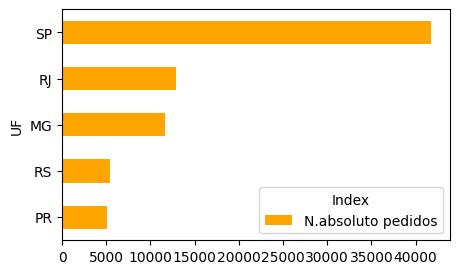

In [90]:
# Plotar um gráfico de barras com as 4 UFs
uf_pedidos_maiores_media = df_clientes_proporcao_uf.loc[mask]
uf_pedidos_maiores_media.set_index('UF', inplace=True)
uf_pedidos_maiores_media = uf_pedidos_maiores_media.drop(['Proporção (decres)', 'Proporção (%)'], axis=1)
uf_pedidos_maiores_media = uf_pedidos_maiores_media.sort_values(by='N.absoluto pedidos', ascending = True)
uf_pedidos_maiores_media.plot(kind='barh', figsize=(5, 3), color ='orange')

### A.1.4. Quais e quantas cidades com n. de pedidos maior ou igual à mediana das cidades com média de pedidos maior ou igual à média por cidade pertencem aos estados com número de pedidos maior ou igual à média de pedidos por estado?

- Para responder, quebrarei em duas perguntas:
    - Quais as cidades com n. de pedidos maior do que a média de pedidos por cidade?
    - Destas, quais as cidades com n. pedidos >= mediana da com n. de pedidos maior do que a média de pedidos por cidade?
    - Elas pertencem aos estados com número de pedidos maior ou igual à média de pedidos por estado?

*Observação*

Inicialmente, iria checar as cidades com média de pedidos maior ou igual à média por cidade que pertenciam aos estados com número de pedidos maior ou igual à média de pedidos por estado; mas como é possível ver na descrição que segue, como são muitas cidades, os valorem ficam muito diluidos, por isso optei pela mediana (e também para usar outra estatística  para exploração) do dataset.
 

In [91]:
# Criar uma nova coluna em df_clientes_cidades_com_pedidos com dados absolutos do número de pedidos

df_clientes_cidades_com_pedidos['N.absoluto pedidos'] = df_clientes.groupby('customer_city')['customer_id'].nunique()
df_clientes_cidades_com_pedidos.reset_index(inplace=True)
df_clientes_cidades_com_pedidos = df_clientes_cidades_com_pedidos.rename(columns={'index': 'Cidade'})
df_clientes_cidades_com_pedidos = df_clientes_cidades_com_pedidos.rename_axis('Index', axis='columns')
df_clientes_cidades_com_pedidos

Index,Cidade,Proporção (decres),Proporção (%),N.absoluto pedidos
0,sao paulo,0.156274,15.627357,15540
1,rio de janeiro,0.069207,6.920687,6882
2,belo horizonte,0.027886,2.788588,2773
3,brasilia,0.021430,2.142979,2131
4,curitiba,0.015296,1.529550,1521
...,...,...,...,...
4114,caldeirao grande do piaui,0.000010,0.001006,1
4115,monte belo do sul,0.000010,0.001006,1
4116,guamiranga,0.000010,0.001006,1
4117,bemposta,0.000010,0.001006,1


In [92]:
# Calcular média da coluna 'N. absoluto pedidos'
media_pedidos_por_cidade = df_clientes_cidades_com_pedidos['N.absoluto pedidos'].mean()
print(f'A média de pedidos por cidade é de {media_pedidos_por_cidade} pedidos.')

# Criar máscara para definir entradas maiores ou iguais à média
mask_cidades_media = df_clientes_cidades_com_pedidos['N.absoluto pedidos'] >= media_pedidos_por_cidade

# Criar novo DF com cidades com N. absolutos de pedidos >= media de pedidos por cidade
df_cidades_n_pedidos_maior_igual_media = df_clientes_cidades_com_pedidos.loc[mask_cidades_media]
df_cidades_n_pedidos_maior_igual_media = df_cidades_n_pedidos_maior_igual_media.drop(['Proporção (decres)', 'Proporção (%)'], axis=1)
df_cidades_n_pedidos_maior_igual_media

A média de pedidos por cidade é de 24.14202476329206 pedidos.


Index,Cidade,N.absoluto pedidos
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
462,aparecida,25
463,tramandai,25
464,coromandel,25
465,arcos,25


In [93]:
# Principais estatísticas do df cidades_n_pedidos_maior_igual_medi
df_cidades_n_pedidos_maior_igual_media.describe()

Index,N.absoluto pedidos
count,467.000000
mean,177.571734
std,813.897077
min,25.000000
25%,36.000000
50%,60.000000
75%,119.500000
max,15540.000000


Como há 467 cidades com o número de pedidos >= média, resolvi checar a mediana deste df e checar a quantidade de cidades com n. pedidos >= à mediana do df_cidades_n_pedidos_maior_igual_media, e decidi usar esta lista de cidades.

In [94]:
# Calcular mediana de pedidos das cidades com n. pedidos maior ou igual a média

df_cidades_n_pedidos_maior_igual_media.median()

Index
N.absoluto pedidos    60.0
dtype: float64

In [95]:
# Listar cidades com n. pedidos >= à mediana das cidades com n. pedidos >+ média pedidos por cidade

df_cidades_n_pedidos_maior_igual_media['N.absoluto pedidos'][df_cidades_n_pedidos_maior_igual_media['N.absoluto pedidos'] >= 60]


0      15540
1       6882
2       2773
3       2131
4       1521
       ...  
230       60
231       60
232       60
233       60
234       60
Name: N.absoluto pedidos, Length: 235, dtype: int64

In [96]:
# Criar novo DF com cidades com n. pedidos >= à mediana das cidades com n. pedidos >+ média pedidos por cidade

# Criar máscara para definir entradas maiores ou iguais à média
mask_cidades_mediana_media = df_clientes_cidades_com_pedidos['N.absoluto pedidos'] >= 60

# Criar novo DF com as cidade c n. pedidos maior igual à mediana do df_cidades_n_pedidos_maior_igual_media

df_cidades_n_pedidos_maior_igual_mediana_media = df_clientes_cidades_com_pedidos.loc[mask_cidades_mediana_media]
df_cidades_n_pedidos_maior_igual_mediana_media = df_cidades_n_pedidos_maior_igual_mediana_media.drop(['Proporção (decres)', 'Proporção (%)'], axis=1)
df_cidades_n_pedidos_maior_igual_mediana_media

Index,Cidade,N.absoluto pedidos
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
230,paranagua,60
231,brusque,60
232,tubarao,60
233,itaborai,60


In [97]:
# Criar variável com cidades + estado de df_clientes
cidade_estado = df_clientes[['customer_city', 'customer_state']]
print(cidade_estado)


               customer_city customer_state
0                     franca             SP
1      sao bernardo do campo             SP
2                  sao paulo             SP
3            mogi das cruzes             SP
4                   campinas             SP
...                      ...            ...
99436              sao paulo             SP
99437        taboao da serra             SP
99438              fortaleza             CE
99439                 canoas             RS
99440                  cotia             SP

[99441 rows x 2 columns]


In [98]:
# Criar nova coluna 'UF' em df_cidades_n_pedidos_maior_igual_mediana_media com cidades em df_clientes

for index, row in df_cidades_n_pedidos_maior_igual_mediana_media.iterrows():
    cidade = row['Cidade']
    uf = cidade_estado.loc[cidade_estado['customer_city'] == cidade, 'customer_state'].values
    if len(uf) > 0:
        df_cidades_n_pedidos_maior_igual_mediana_media.loc[df_cidades_n_pedidos_maior_igual_mediana_media['Cidade'] == cidade, 'UF'] = uf[0]

df_cidades_n_pedidos_maior_igual_mediana_media

Index,Cidade,N.absoluto pedidos,UF
0,sao paulo,15540,SP
1,rio de janeiro,6882,RJ
2,belo horizonte,2773,MG
3,brasilia,2131,DF
4,curitiba,1521,PR
...,...,...,...
230,paranagua,60,PR
231,brusque,60,SC
232,tubarao,60,SC
233,itaborai,60,RJ


In [99]:
# Checar quais e quantas cidades pertecem aos 4 estados com n. pedidos >= média de pedidos por estado

cidades_uf_pedidos_maiores_media = np.array([])

for cidade, uf in zip(df_cidades_n_pedidos_maior_igual_mediana_media['Cidade'], df_cidades_n_pedidos_maior_igual_mediana_media['UF']):
    if uf in uf_pedidos_maiores_media.index:
        cidades_uf_pedidos_maiores_media = np.append(cidades_uf_pedidos_maiores_media, True)
    else:
        cidades_uf_pedidos_maiores_media = np.append(cidades_uf_pedidos_maiores_media, False)

cidades_uf_pedidos_maiores_media

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [100]:
# Criar nova coluna UF >= media em  df_cidades_n_pedidos_maior_igual_mediana_media importando narray cidades_uf_pedidos_maiores_media
df_cidades_n_pedidos_maior_igual_mediana_media['UF >= media'] = cidades_uf_pedidos_maiores_media

df_cidades_n_pedidos_maior_igual_mediana_media

Index,Cidade,N.absoluto pedidos,UF,UF >= media
0,sao paulo,15540,SP,1.0
1,rio de janeiro,6882,RJ,1.0
2,belo horizonte,2773,MG,1.0
3,brasilia,2131,DF,0.0
4,curitiba,1521,PR,1.0
...,...,...,...,...
230,paranagua,60,PR,1.0
231,brusque,60,SC,0.0
232,tubarao,60,SC,0.0
233,itaborai,60,RJ,1.0


In [101]:
# Criar máscara
mask = df_cidades_n_pedidos_maior_igual_mediana_media['UF >= media'] == 1.0

# Aplicar máscara criando novo DF
df_cidades_n_pedidos_maior_igual_mediana_media_uf = df_cidades_n_pedidos_maior_igual_mediana_media.loc[mask]

# Criar array com UF e Cidades
cidades_n_pedidos_maior_igual_mediana_media_uf = df_cidades_n_pedidos_maior_igual_mediana_media_uf.groupby('UF')['Cidade'].apply(list).reset_index()
cidades_por_ufs = np.array(cidades_n_pedidos_maior_igual_mediana_media_uf)
cidades_por_ufs

array([['MG',
        list(['belo horizonte', 'juiz de fora', 'contagem', 'uberlandia', 'montes claros', 'betim', 'uberaba', 'ipatinga', 'governador valadares', 'divinopolis', 'pouso alegre', 'sete lagoas', 'pocos de caldas', 'ribeirao das neves', 'patos de minas', 'santa luzia', 'nova lima', 'itajuba', 'vicosa', 'varginha', 'conselheiro lafaiete', 'lavras', 'barbacena', 'itabira', 'araxa', 'teofilo otoni', 'sao joao del rei', 'manhuacu', 'muriae', 'paracatu', 'caratinga', 'lagoa santa'])],
       ['PR',
        list(['curitiba', 'londrina', 'maringa', 'cascavel', 'ponta grossa', 'sao jose dos pinhais', 'foz do iguacu', 'toledo', 'pinhais', 'guarapuava', 'colombo', 'paranagua'])],
       ['RJ',
        list(['rio de janeiro', 'niteroi', 'nova iguacu', 'sao goncalo', 'duque de caxias', 'petropolis', 'macae', 'campos dos goytacazes', 'volta redonda', 'nova friburgo', 'marica', 'rio das ostras', 'sao joao de meriti', 'barra mansa', 'teresopolis', 'cabo frio', 'resende', 'mage', 'belford r

In [102]:
print(f'Respondendo à pergunta em A.1.4.: 178 cidades pertencem aos estados com n. de pedidos maior ou igual à média de pedidos por estados.')

print(f'Em Minas Gerais, as cidades são {cidades_por_ufs[0, 1]}.')

print(f'No Paraná, as cidades são {cidades_por_ufs[1, 1]}.')

print(f'No Rio de Janeiro, as cidades são {cidades_por_ufs[2, 1]}.')

print(f'No Rio dGrande do Sul, as cidades são {cidades_por_ufs[3, 1]}.')

print(f'Em São Paulo, as cidades são {cidades_por_ufs[4, 1]}.')

Respondendo à pergunta em A.1.4.: 178 cidades pertencem aos estados com n. de pedidos maior ou igual à média de pedidos por estados.
Em Minas Gerais, as cidades são ['belo horizonte', 'juiz de fora', 'contagem', 'uberlandia', 'montes claros', 'betim', 'uberaba', 'ipatinga', 'governador valadares', 'divinopolis', 'pouso alegre', 'sete lagoas', 'pocos de caldas', 'ribeirao das neves', 'patos de minas', 'santa luzia', 'nova lima', 'itajuba', 'vicosa', 'varginha', 'conselheiro lafaiete', 'lavras', 'barbacena', 'itabira', 'araxa', 'teofilo otoni', 'sao joao del rei', 'manhuacu', 'muriae', 'paracatu', 'caratinga', 'lagoa santa'].
No Paraná, as cidades são ['curitiba', 'londrina', 'maringa', 'cascavel', 'ponta grossa', 'sao jose dos pinhais', 'foz do iguacu', 'toledo', 'pinhais', 'guarapuava', 'colombo', 'paranagua'].
No Rio de Janeiro, as cidades são ['rio de janeiro', 'niteroi', 'nova iguacu', 'sao goncalo', 'duque de caxias', 'petropolis', 'macae', 'campos dos goytacazes', 'volta redonda',

### 

## A.2. Conhecendo o dataset de Pedidos (oilst_orders_dataset.csv)

In [103]:
# Verificar tipo da variável do dataset para checar se foi importanto como solicitado

type(df_pedidos)

pandas.core.frame.DataFrame

In [104]:
# Visualiazr 10 primeiros registros

df_pedidos.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [105]:
# visualizar 10 resgistros finais

df_pedidos.tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


### A.2.1. Características gerais de df_pedidos

In [106]:
# Explorar quantidade e linhas e colunas

print(f'O DataFrame df_pedidos possui a seguinte quantidade de linhas e colunas: {df_pedidos.shape}.')

# Checar quais são as colunas
print(f'As colunas são: {df_pedidos.columns}.')

O DataFrame df_pedidos possui a seguinte quantidade de linhas e colunas: (99441, 8).
As colunas são: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object').


In [107]:
# Checar tipagem dos dados

df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [108]:
# Ver ínidice

df_pedidos.index

RangeIndex(start=0, stop=99441, step=1)

In [109]:
# Checar se há colunas com entradas NaN

df_pedidos.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [110]:
# Checar quantidade de NaN por coluna
numero_entradas_nan_coluna = df_pedidos.isna().sum()
numero_entradas_nan_coluna

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Resumindo as infos coletadas até aqui

Até aqui, levantamos que df_pedidos possui:

- 99.441 entradas (ou linhas).
- 8 colunas dtype object ('order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date').
- Todas as entradas são Non-Null.
- Index com uma sequência numérica que começa em 0 e vai até 99.440.
- Três colunas com entradas NaN
    - order_approved_at: 160
    - order_delivered_carrier_date: 1.783
    - order_delivered_customer_date: 2.965

### A.2.2. Pergunta a ser respondida utilizando filtro por máscara de seleção booleana

#### Quantos pedidos foram entregues para o cliente em 2016 ou em 2018 (order_delivered_customer_date)?
- Resposta: 55.546 pedidos

In [111]:
# Criar uma nova coluna em df_pedidos extraindo apenas o ano de 'order_delivered_customer_date'
# Criar array com apenas os anos da coluna 'order_delivered_customer_date'
df_pedidos_entrega_cliente_ano = df_pedidos['order_delivered_customer_date'].str.split(' ', 1, expand = True)
df_pedidos_entrega_cliente_ano = df_pedidos_entrega_cliente_ano.drop(1, axis = 1).rename(columns = {0: 'only_date_order_delivered_customer_date'})
df_pedidos_entrega_cliente_ano['only_year'] = df_pedidos_entrega_cliente_ano['only_date_order_delivered_customer_date'].str.slice(0,4)
pedidos_entrega_cliente_ano = np.array(df_pedidos_entrega_cliente_ano['only_year'])

# Inserir array como nova coluna em df_pedidos
df_pedidos['only_year_order_delivered_customer_date'] = pedidos_entrega_cliente_ano
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   order_id                                 99441 non-null  object
 1   customer_id                              99441 non-null  object
 2   order_status                             99441 non-null  object
 3   order_purchase_timestamp                 99441 non-null  object
 4   order_approved_at                        99281 non-null  object
 5   order_delivered_carrier_date             97658 non-null  object
 6   order_delivered_customer_date            96476 non-null  object
 7   order_estimated_delivery_date            99441 non-null  object
 8   only_year_order_delivered_customer_date  96476 non-null  object
dtypes: object(9)
memory usage: 6.8+ MB


In [112]:
# Criar máscara booleana e aplicar criando um novo df filtrado
mask = (df_pedidos['only_year_order_delivered_customer_date'] == '2018') | (df_pedidos['only_year_order_delivered_customer_date'] == '2016')
df_pedidos_entrega_cliente_2016_2018 = df_pedidos.loc[mask]

# Coletar infos de novo df para responder }a pergunta
df_pedidos_entrega_cliente_2016_2018.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55546 entries, 1 to 99440
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   order_id                                 55546 non-null  object
 1   customer_id                              55546 non-null  object
 2   order_status                             55546 non-null  object
 3   order_purchase_timestamp                 55546 non-null  object
 4   order_approved_at                        55546 non-null  object
 5   order_delivered_carrier_date             55546 non-null  object
 6   order_delivered_customer_date            55546 non-null  object
 7   order_estimated_delivery_date            55546 non-null  object
 8   only_year_order_delivered_customer_date  55546 non-null  object
dtypes: object(9)
memory usage: 4.2+ MB
